In [46]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset

In [47]:
df = pd.read_csv(r"C:\Users\rahul\Downloads\score.csv")

In [15]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [16]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [17]:
df.shape

(25, 2)

# Discover and visulize the data to gain innsights

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [19]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


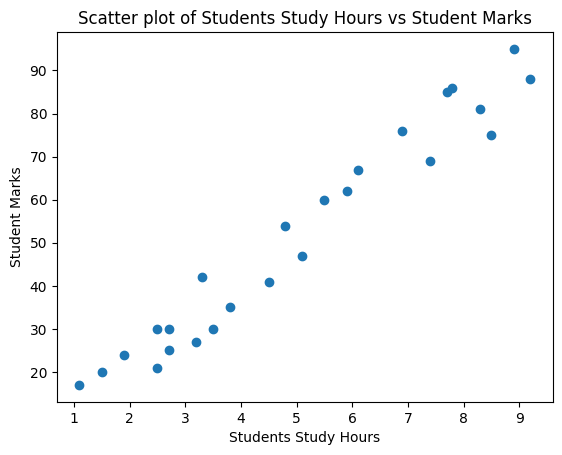

In [20]:
plt.scatter(x = df.Hours, y = df.Scores)
plt.xlabel("Students Study Hours")
plt.ylabel("Student Marks")
plt.title("Scatter plot of Students Study Hours vs Student Marks")
plt.show()

# Prepare the data for Machine Learning algorithms

In [21]:
# Data Cleaning


In [22]:
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [23]:
df.mean()

Hours      5.012
Scores    51.480
dtype: float64

In [24]:
# Split Dataset

In [25]:
X =df.drop("Scores", axis = "columns")
y =df.drop("Hours", axis = "columns")
print("Shape of X = ",X.shape)
print("Shape of y = ",y.shape)

Shape of X =  (25, 1)
Shape of y =  (25, 1)


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=51)
print("Shape of X_train = ",X_train.shape)
print("Shape of y_train = ",y_train.shape)

print("Shape of X_test = ",X_test.shape)
print("Shape of y_test = ",y_test.shape)

Shape of X_train =  (20, 1)
Shape of y_train =  (20, 1)
Shape of X_test =  (5, 1)
Shape of y_test =  (5, 1)


# Select a model and train it

In [27]:
#y = m * x + c
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [28]:
linear.coef_

array([[9.56433743]])

In [29]:
linear.intercept_

array([2.70197068])

In [30]:
m = 9.56
c = 2.70
y = m * 4 + c
y

40.940000000000005

In [31]:
linear.predict([[4]])[0][0].round(2)

C:\Users\rahul\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


40.96

In [32]:
y_pred = linear.predict(X_test)
y_pred

array([[55.30582657],
       [76.34736893],
       [68.69589898],
       [82.08597139],
       [28.52568176]])

In [33]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["Study_hours", "Students_marks_original", "Student_marks_predicted"])

,Study_hours,Students_marks_original,Student_marks_predicted
0,5.5,60.0,55.305827
1,7.7,85.0,76.347369
2,6.9,76.0,68.695899
3,8.3,81.0,82.085971
4,2.7,30.0,28.525682


# Fine-tune your model

In [34]:
linear.score(X_test,y_test)

0.9238518102278781

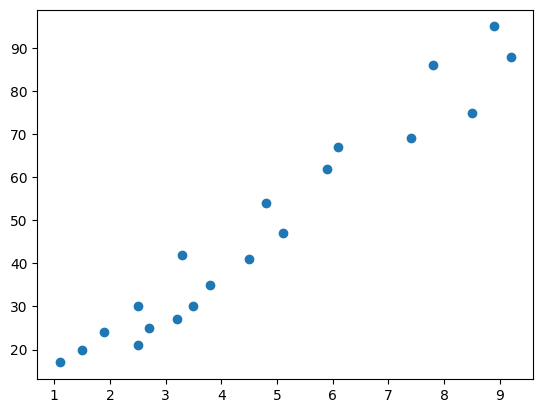

In [35]:
plt.scatter(X_train,y_train)

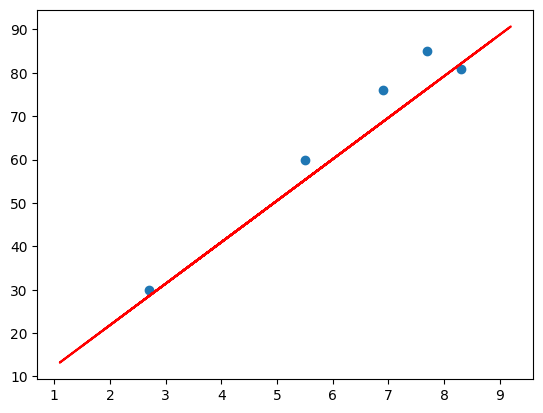

In [36]:
plt.scatter(X_test, y_test)
plt.plot(X_train, linear.predict(X_train),color="r")

# Present your solution

# Save ML Model

In [37]:
import joblib
joblib.dump(linear, "Student_mark_predictor_model.pkl")

['Student_mark_predictor_model.pkl']

In [38]:
load = joblib.load("Student_mark_predictor_model.pkl")

In [39]:
load.predict([[4]])[0][0].round(2)

C:\Users\rahul\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


40.96

# Launch,Monitor,and Maintain ypur system

In [40]:
load.predict([[8]])[0][0].round(2)

C:\Users\rahul\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


79.22

In [43]:
load.predict([[9]])[0][0].round(2)

C:\Users\rahul\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


88.78

In [ ]:
import tkinter as tk
from tkinter import ttk
import joblib

# Load the saved model
linear = joblib.load("Student_mark_predictor_model.pkl")

def calculate_mark(hours):
    mark = linear.predict([[float(hours)]])[0][0].round(2)
    mark_label.config(text=f"Predicted Mark: {mark}")

# Create the main window
root = tk.Tk()
root.title("Student Marks Predictor")

# Create a label for the title
title_label = ttk.Label(root, text="Student Marks Predictor", font=("Arial", 16, "bold"))
title_label.grid(column=0, row=0, padx=10, pady=10, sticky="w")

# Create a label and input field for the number of hours studied
hours_label = ttk.Label(root, text="Enter the number of hours you study:")
hours_label.grid(column=0, row=1, padx=10, pady=10, sticky="w")
hours_entry = ttk.Entry(root, width=10)
hours_entry.grid(column=1, row=1, padx=10, pady=10, sticky="w")

# Create a button to calculate the predicted mark
calculate_button = ttk.Button(root, text="Calculate Predicted Mark", command=lambda: calculate_mark(hours_entry.get()))
calculate_button.grid(column=0, row=2, padx=10, pady=10, sticky="w")

# Create a label to display the predicted mark
mark_label = ttk.Label(root, text="")
mark_label.grid(column=1, row=2, padx=10, pady=10, sticky="w")

# Start the main loop
root.mainloop()

C:\Users\rahul\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\rahul\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\rahul\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\rahul\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\rahul\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.w